In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import yfinance as yf
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [5]:
df = pd.read_excel("stocks.xlsx")

print("Shape:", df.shape)

print(df.head())

Shape: (248, 8)
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

print(df.isnull().sum())

df.dropna(how='all', inplace=True)

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
report = ProfileReport(df, title="Stock Market Analysis", explorative=True)
report.to_file("EDA_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 166111.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

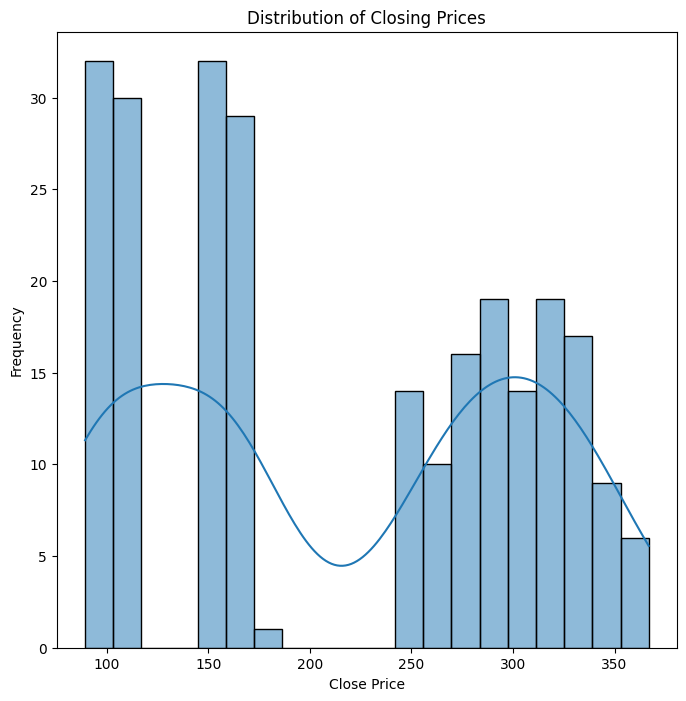

In [21]:
plt.figure(figsize=(8, 8))
sns.histplot(df['Close'], kde=True, bins=20)
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Volume', y='Close', hue='Ticker')
plt.title("Volume vs Close Price")
plt.xlabel("Volume")
plt.ylabel("Close")
plt.show()

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

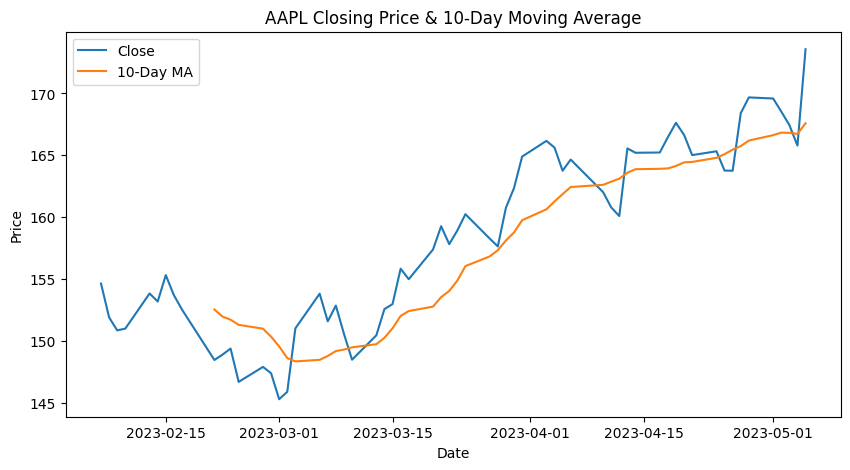

In [22]:
aapl = df[df['Ticker'] == 'AAPL'].copy()
aapl['MA_10'] = aapl['Close'].rolling(window=10).mean()
aapl['Volatility'] = aapl['Close'].rolling(window=10).std()

plt.figure(figsize=(10, 5))
plt.plot(aapl['Date'], aapl['Close'], label='Close')
plt.plot(aapl['Date'], aapl['MA_10'], label='10-Day MA')
plt.title("AAPL Closing Price & 10-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

📉 Mean Squared Error (MSE): 6881.89
📈 R² Score: 0.1565


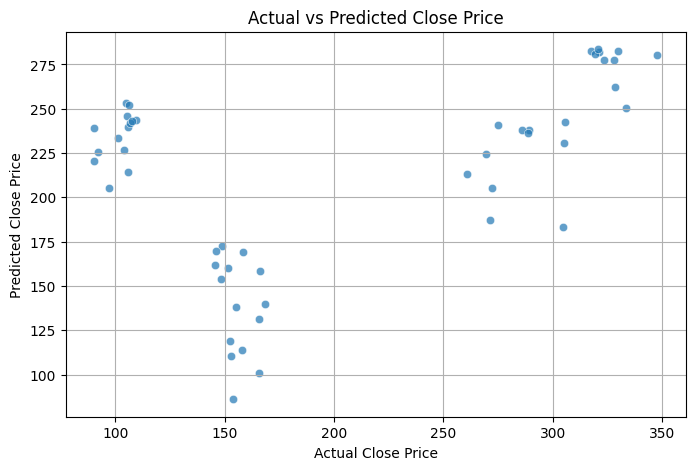

🔮 Predicted Close Price for Volume 50M: ₹174.74


In [26]:
df_ml = pd.get_dummies(df, columns=['Ticker'], drop_first=True)

X = df_ml[['Volume']]
y = df_ml['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error (MSE): {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.grid(True)
plt.show()

custom_volume_df = pd.DataFrame({'Volume': [50000000]})
custom_scaled = scaler.transform(custom_volume_df)
predicted_close = model.predict(custom_scaled)

print(f"🔮 Predicted Close Price for Volume 50M: ₹{predicted_close[0]:.2f}")